<font size = 5>Problem Statement and Anlsysis of basic Metrics<font>

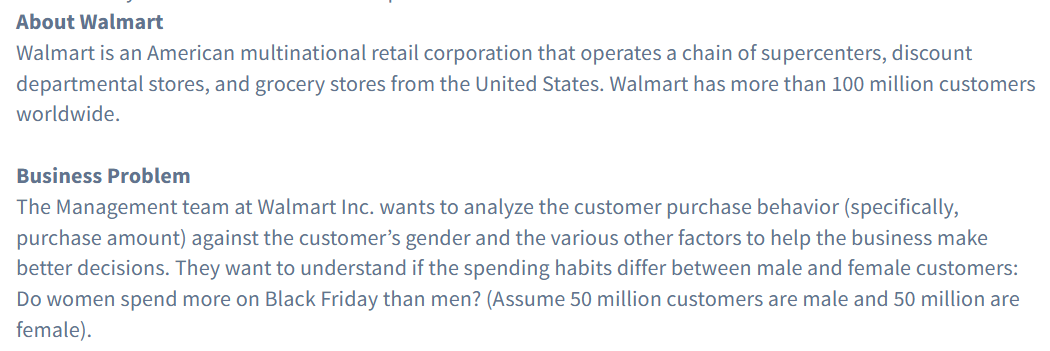

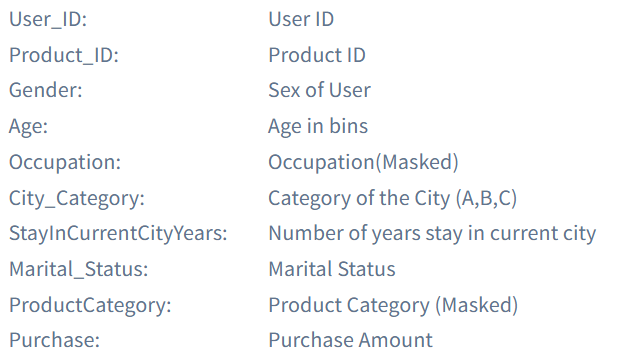

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094 -O walmart_data.csv

--2025-04-16 08:51:02--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.172.139.94, 18.172.139.210, 18.172.139.46, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.172.139.94|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23027994 (22M) [text/plain]
Saving to: ‘walmart_data.csv’

walmart_data.csv    100%[===================>]  21.96M  72.8MB/s    in 0.3s    

2025-04-16 08:51:03 (72.8 MB/s) - ‘walmart_data.csv’ saved [23027994/23027994]



In [ ]:
df = pd.read_csv('walmart_data.csv')
df.head(20)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


<font size = 5>**Data Preprocessing**<font>

In [ ]:
print(f"Number of Rows {df.shape[0]}")
print(f"Number of columns {df.shape[1]}")

Number of Rows 550068
Number of columns 10


In [ ]:
df.isna().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


There are no null values in the dataset

In [ ]:
# Checking for duplicate rows -
duplicate_rows = df[df.duplicated()]
print(duplicate_rows.shape[0])

0


In [ ]:
df.describe(include=['object', 'category']).T


,count,unique,top,freq
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [ ]:
df.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,int64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category,int64
Purchase,int64




* As the occupation column is masked,the datatype of occupation column is int64. But it should be a categorical column. Hence changing the datatype of occupation column to object datatype.

* Similarly Marital_Status and product_category columns are also has categorical type of data, the aggregation of the values of these columns won't give us any insight. Hence changing them to object datatype

In [ ]:
df1 = df.astype({'Occupation': 'object', 'Marital_Status': 'object', 'Product_Category': 'object'})
df1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df1.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,object
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,object
Product_Category,object
Purchase,int64


Finally checking again, after making the datatype changes in occupation column.

In [ ]:
df1.describe(include=['object', 'category']).T

,count,unique,top,freq
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
Occupation,550068,21,4,72308
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821
Marital_Status,550068,2,0,324731
Product_Category,550068,20,5,150933


In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


**Observations**
1. There are no Null Values.
2. There are no duplicate rows.
3. standard deviation for purchase column is very high. This variables might have the outliers in it.
4. We have 7 distinct age bins out of which most customers lies between the age bucket of 26-35.
5. More than half of the customers in the dataset are unmarried.
6. Most number of transactions are done by male in the dataset.


<font size = 5>Analysis Based On Gender

<font size = 4> Univariate analysis

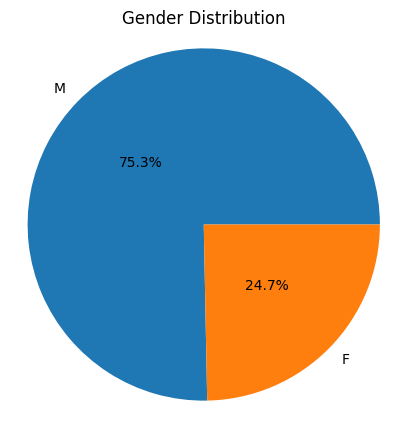

In [ ]:
# Gender Distribution -
import matplotlib.pyplot as plt

# Get counts and labels in matching order
gender_counts = df1['Gender'].value_counts()
x = gender_counts.values
labels = gender_counts.index

# Plot
plt.figure(figsize=(5, 5))
plt.pie(x, center=(0, 0), radius=1.5, labels=labels, autopct='%1.1f%%', pctdistance=0.5)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

so out of 550068 transactions 75.3% transcations are made by male and 24.7% are made by female

<font size = 4> Bivariate analysis - Gender vs Purchase Amount

In [ ]:
#no.of unique users in each gender
df1.groupby('Gender')['User_ID'].nunique()

,User_ID
Gender,
F,1666
M,4225


In [ ]:
df1.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


<Axes: xlabel='Gender', ylabel='Purchase'>

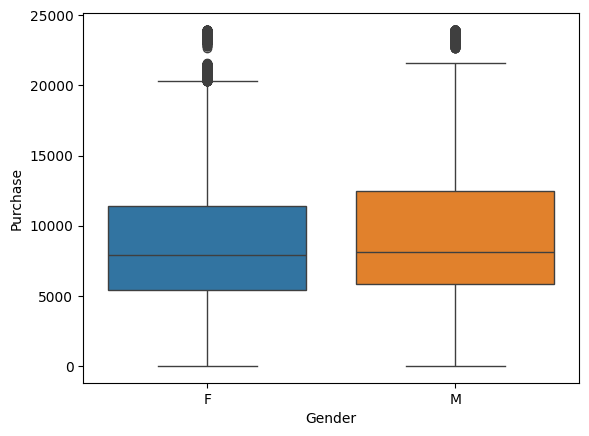

In [ ]:
sns.boxplot(x='Gender', y='Purchase', data=df1, hue = 'Gender')

So here we can see that 4225 male user made an average purchase of 9438

And 1666 female user made an average purchase of 8735

<Figure size 2000x800 with 0 Axes>

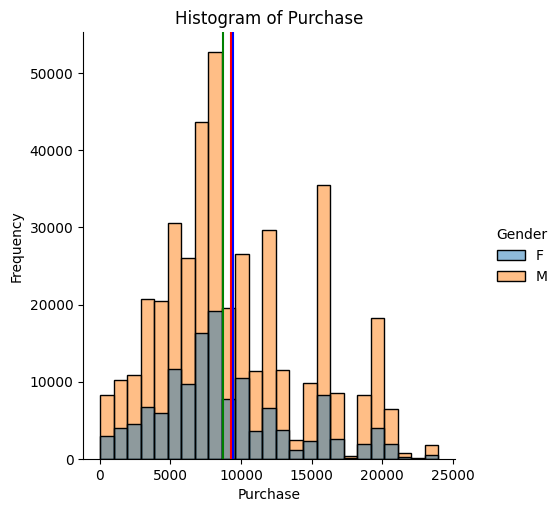

In [ ]:
# Plotting all the observations -

plt.figure(figsize=(20, 8))
sns.displot(x='Purchase', data=df, bins=25, hue='Gender')

plt.axvline(x=df['Purchase'].mean(), color='r')
plt.axvline(x=df[df['Gender']=='M']['Purchase'].mean(), color='b')
plt.axvline(x=df[df['Gender']=='F']['Purchase'].mean(), color='g')

plt.xlabel('Purchase')
plt.ylabel('Frequency')
plt.title('Histogram of Purchase')
plt.show()

This graph shows how many people made purchases in different price ranges, separated by gender. The three vertical lines show the average purchase amount: one for everyone (red), one just for males (blue), and one just for females (green).

Lets consider this sample dataset as population dataset and apply CLT(Central Limit Theorem) on its sample to check if it gives population characteristics or not.

Lets take a sample of 300

In [ ]:
df.sample(300).groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,65.0,9185.261538,5314.734255,695.0,5456.0,8060.0,12033.0,23220.0
M,235.0,9298.944681,5084.601455,563.0,5659.5,8058.0,12005.5,23809.0


Every time we take a sample, our mean value is different. There is a variability in the sample mean itself.
Does the sample mean itself follow a distribution? Let’s assess this.

Let us pick around 1,000 random samples of size 300 from the entire data set and calculate the mean of each sample.

In [ ]:
size=300
iterations=1000

In [ ]:
male_sample_means=[df[df['Gender']=='M']['Purchase'].sample(size).mean() for i in range(iterations)]

In [ ]:
female_sample_means=[df[df['Gender']=='F']['Purchase'].sample(size).mean() for i in range(iterations)]

Plotting the distribution of all these sample means (This is our sampling distribution). -

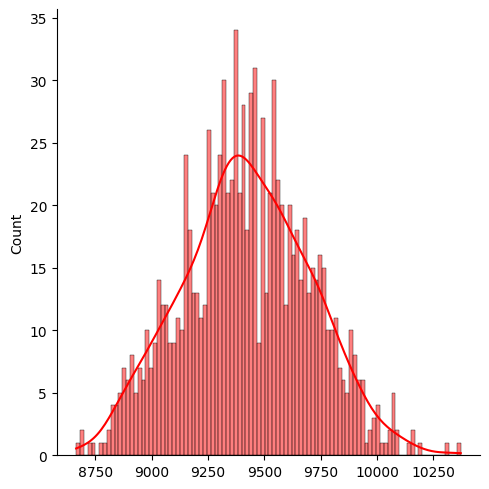

In [ ]:
sns.displot(male_sample_means, bins=100, kde=True, color='r')

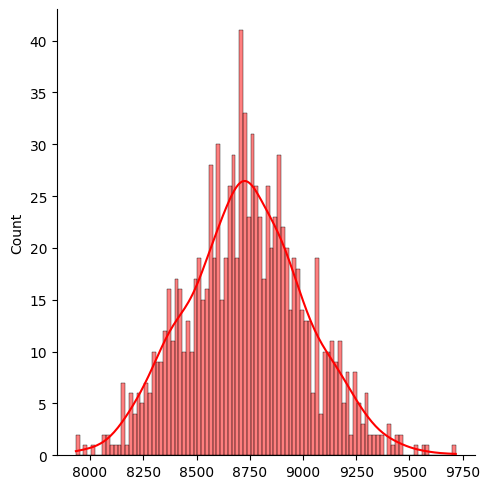

In [ ]:
sns.displot(female_sample_means, bins=100, kde=True, color='r')

We can observe that the sampling distribution is nearly normal.

Now we will compute the mean and standard deviation of this sampling distribution.

In [ ]:
print("Mean (For males):", round(pd.Series(male_sample_means).mean(), 2))

Mean (For males): 9421.51


In [ ]:
print("Mean (For females):", round(pd.Series(female_sample_means).mean(), 2))

Mean (For females): 8735.39


The mean of this sampling distribution (or in other words, the mean of all the sample means that we had taken), came out pretty close to the original population mean. This demonstrates the first property of the Central Limit theorem. <br>
Sampling Distribution Mean = Population Mean

However, it would not be fair to infer that the population mean is exactly equal to the sample mean. It is because the defects in the sampling process always tend to cause some errors. Therefore, the sample mean’s value must be reported with some margin of error.

In [ ]:
round(pd.Series(male_sample_means).std(), 2)

283.18

In [ ]:
stdErr = round(pd.Series(male_sample_means).std()/np.sqrt(1000), 2)
stdErr

np.float64(8.96)

Now that we have verified these two properties, let us observe the effect of sample size on the resulting sampling distribution. In this demonstration, we will observe that as the sample size increases, the underlying sampling distribution will approximate to a normal distribution.

Now we are going to calculate confidence interval of 90%, 95% and 99% using this formula
**<font color='purple'></font>**   

Confidence Interval = $\bar X ± Z \left( \frac {σ}{\sqrt n}\right)$

OR  
$[\bar {X} - Z * (\frac{σ}{\sqrt n}) \ ,\  \bar {X} + Z * (\frac{σ}{\sqrt n})]$    

#### For 90% Confidence Interval -

In [ ]:
from scipy.stats import norm
z90 = norm.ppf(1-0.05)

In [ ]:
# For females -
lower_limit_f = pd.Series(female_sample_means).mean() - (pd.Series(female_sample_means).std()/ np.sqrt(1000)) * z90
upper_limit_f = pd.Series(female_sample_means).mean() + (pd.Series(female_sample_means).std()/ np.sqrt(1000)) * z90

In [ ]:
print("Lower Limit for Females is {:.2f}".format(lower_limit_f))
print("Upper Limit for Females is {:.2f}".format(upper_limit_f))

Lower Limit for Females is 8720.89
Upper Limit for Females is 8749.89


In [ ]:
# For males -
lower_limit_m = pd.Series(male_sample_means).mean() - (pd.Series(male_sample_means).std()/ np.sqrt(1000)) * z90
upper_limit_m = pd.Series(male_sample_means).mean() + (pd.Series(male_sample_means).std()/ np.sqrt(1000)) * z90

In [ ]:
print("Lower Limit for Males is {:.2f}".format(lower_limit_m))
print("Upper Limit for Males is {:.2f}".format(upper_limit_m))

Lower Limit for Males is 9406.78
Upper Limit for Males is 9436.24


#### For 95% Confidence Interval -

In [ ]:
from scipy.stats import norm
z95 = norm.ppf(1-0.025)

In [ ]:
# For females -
lower_limit_f = pd.Series(female_sample_means).mean() - (pd.Series(female_sample_means).std()/ np.sqrt(1000)) * z95
upper_limit_f = pd.Series(female_sample_means).mean() + (pd.Series(female_sample_means).std()/ np.sqrt(1000)) * z95

In [ ]:
print("Lower Limit for Females is {:.2f}".format(lower_limit_f))
print("Upper Limit for Females is {:.2f}".format(upper_limit_f))

Lower Limit for Females is 8718.12
Upper Limit for Females is 8752.67


In [ ]:
# For males -
lower_limit_m = pd.Series(male_sample_means).mean() - (pd.Series(male_sample_means).std()/ np.sqrt(1000)) * z95
upper_limit_m = pd.Series(male_sample_means).mean() + (pd.Series(male_sample_means).std()/ np.sqrt(1000)) * z95

In [ ]:
print("Lower Limit for Males is {:.2f}".format(lower_limit_m))
print("Upper Limit for Males is {:.2f}".format(upper_limit_m))

Lower Limit for Males is 9403.96
Upper Limit for Males is 9439.06


#### For 99% Confidence Interval -

In [ ]:
from scipy.stats import norm
z99 = norm.ppf(1-0.005)


In [ ]:
# For females -
lower_limit_f = pd.Series(female_sample_means).mean() - (pd.Series(female_sample_means).std()/ np.sqrt(1000)) * z99
upper_limit_f = pd.Series(female_sample_means).mean() + (pd.Series(female_sample_means).std()/ np.sqrt(1000)) * z99

In [ ]:
print("Lower Limit for Females is {:.2f}".format(lower_limit_f))
print("Upper Limit for Females is {:.2f}".format(upper_limit_f))

Lower Limit for Females is 8712.69
Upper Limit for Females is 8758.10


In [ ]:
# For males -
lower_limit_m = pd.Series(male_sample_means).mean() - (pd.Series(male_sample_means).std()/ np.sqrt(1000)) * z99
upper_limit_m = pd.Series(male_sample_means).mean() + (pd.Series(male_sample_means).std()/ np.sqrt(1000)) * z99

In [ ]:
print("Lower Limit for Males is {:.2f}".format(lower_limit_m))
print("Upper Limit for Males is {:.2f}".format(upper_limit_m))

Lower Limit for Males is 9398.44
Upper Limit for Males is 9444.58


Based on non-overlapping confidence intervals, we conclude with high confidence that male customers spend significantly more than female customers during Black Friday. Walmart can use this insight to strategically tailor marketing, promotions, and inventory toward male shoppers to maximize revenue.

We'll repeat the exact same process for Marital Status.

---
### Analysis according to Marital Status -
---

<font size = 4> Univariate Analysis

In [ ]:
# Mapping integer values 0/1 to Unmarried/Married -
df1['Marital_Status'] = df['Marital_Status'].map({0: 'Unmarried',
                                                 1: 'Married'})

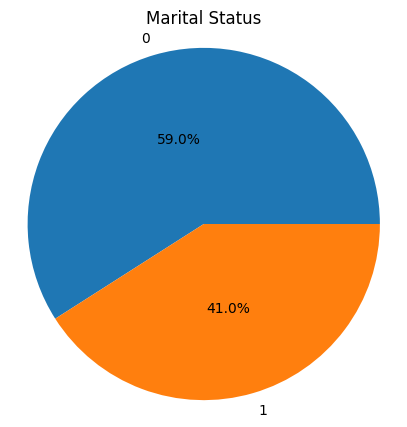

In [ ]:
# Marital Status -
x = df['Marital_Status'].value_counts().values

plt.figure(figsize=(5, 5))
plt.pie(x, center=(0, 0), radius=1.5, labels=df['Marital_Status'].unique(), autopct='%1.1f%%', pctdistance=0.5)
plt.title('Marital Status')
plt.axis('equal')
plt.show()

Of the 550,068 transactions, approximately 59% were made by unmarried customers.

<font size = 4> Bivariate Analysis - Maritial Status VS Purchase Amount

In [ ]:
# No. of unique users in each category -
df.groupby('Marital_Status')['User_ID'].nunique()

,User_ID
Marital_Status,
0,3417
1,2474


In [ ]:
# Checking different metrics based on purchase by different categories -
df.groupby('Marital_Status')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
1,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


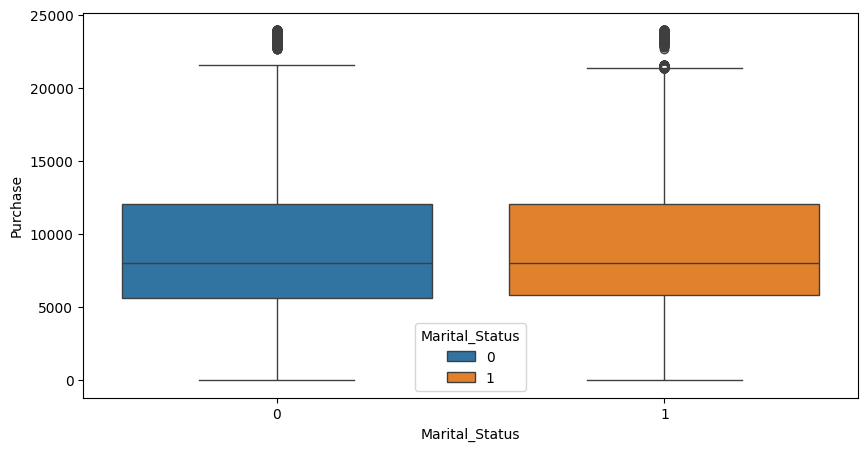

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Marital_Status', y='Purchase', data=df, hue = 'Marital_Status')
plt.show()

>##### In one month, 2474 Married customers are spending around 9261.17 units on average & 8051.0 median.
>##### 3417 Unmarried customers are spending an average of 9265.90 units and median 8044.0 units.

In [ ]:
# Checking the ratio of unmarried to married -
print(round(3417/2474, 2))

1.38


**Observation** </br>
Unmarried : Married  ->  2.76:2

<Figure size 2000x800 with 0 Axes>

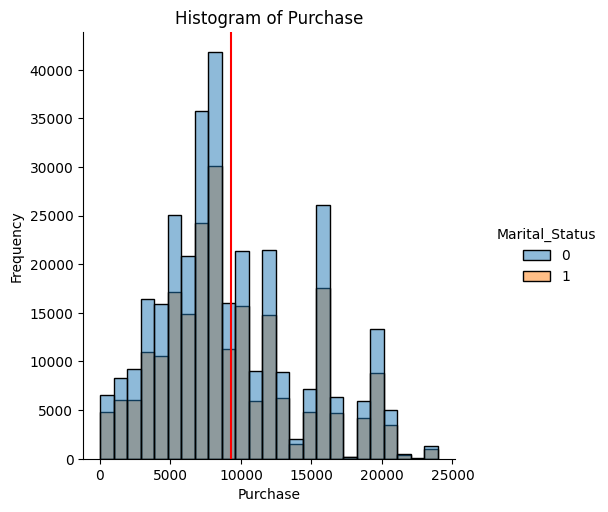

In [ ]:
# Plotting all the observations -

plt.figure(figsize=(20, 8))
sns.displot(x='Purchase', data=df, bins=25, hue='Marital_Status')

plt.axvline(x=df['Purchase'].mean(), color='r')
plt.axvline(x=df[df['Marital_Status']=='Married']['Purchase'].mean(), color='g')
plt.axvline(x=df[df['Marital_Status']=='Unmarried']['Purchase'].mean(), color='b')

plt.xlabel('Purchase')
plt.ylabel('Frequency')
plt.title('Histogram of Purchase')
plt.show()

It is observed that the distribution is close to normal.

Let us take a random sample (size = 300) from this data to analyse the sample mean.

In [ ]:
df.sample(300).groupby('Marital_Status')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,182.0,9489.736264,5280.207002,50.0,5839.25,8558.5,12878.25,23222.0
1,118.0,9574.084746,4586.764909,1677.0,6025.25,8116.5,12404.50,19339.0


Let us pick around 1,000 random samples of size 300 from the entire data set and calculate the mean of each sample.

In [ ]:
size=300
iterations=1000

In [ ]:
unmarried_sample_means=[df[df['Marital_Status']==0]['Purchase'].sample(size).mean() for i in range(iterations)]

In [ ]:
married_sample_means=[df[df['Marital_Status']==1]['Purchase'].sample(size).mean() for i in range(iterations)]

Plotting the distribution of all these sample means (This is our sampling distribution). -

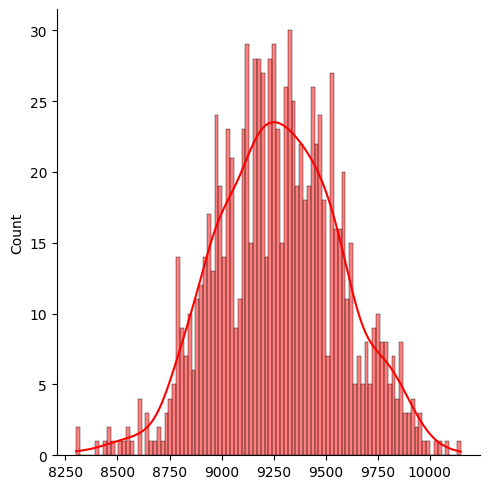

In [ ]:
sns.displot(unmarried_sample_means, bins=100, kde=True, color='r')

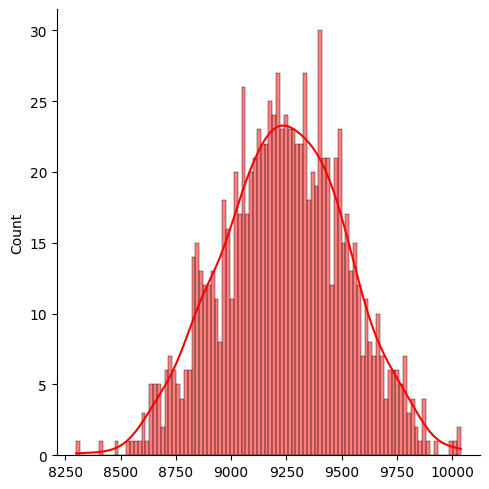

In [ ]:
sns.displot(married_sample_means, bins=100, kde=True, color='r')

We can see that the sampling distribution is very close to normal.

Computing the mean and standard deviation of this sampling distribution.

In [ ]:
print("Mean (For unmarried):", round(pd.Series(unmarried_sample_means).mean(), 2))

Mean (For unmarried): 9275.74


In [ ]:
print("Mean (For married):", round(pd.Series(married_sample_means).mean(), 2))

Mean (For married): 9238.18


The mean of this sampling distribution (or in other words, the mean of all the sample means that we had taken), also came out pretty close to the original population mean. This clearly demonstrates the first property of the Central Limit theorem. <br>
Sampling Distribution Mean = Population Mean

However, as earlier said it would not be fair to infer that the population mean is exactly equal to the sample mean. It is because the defects in the sampling process always tend to cause some errors. Therefore, the sample mean’s value must be reported with some margin of error.

In [ ]:
round(pd.Series(married_sample_means).std(), 2)

289.5

In [ ]:
round(pd.Series(married_sample_means).std()/np.sqrt(1000), 2)

np.float64(9.15)

Now that we have verified both of these properties, let us observe the effect of sample size on the resulting sampling distribution. In this demonstration, we will observe that as the sample size increases, the underlying sampling distribution will approximate to a normal distribution.

Now we are going to calculate confidence interval of 90%, 95% and 99% using this formula
**<font color='purple'></font>**   

Confidence Interval = $\bar X ± Z \left( \frac {σ}{\sqrt n}\right)$

OR  
$[\bar {X} - Z * (\frac{σ}{\sqrt n}) \ ,\  \bar {X} + Z * (\frac{σ}{\sqrt n})]$    

#### For 90% Confidence Interval -

In [ ]:
from scipy.stats import norm
z90 = norm.ppf(1-0.05)

In [ ]:
# For married -
lower_limit_f = pd.Series(married_sample_means).mean() - (pd.Series(married_sample_means).std()/ np.sqrt(1000)) * z90
upper_limit_f = pd.Series(married_sample_means).mean() + (pd.Series(married_sample_means).std()/ np.sqrt(1000)) * z90

In [ ]:
print("Lower Limit for married is {:.2f}".format(lower_limit_f))
print("Upper Limit for married is {:.2f}".format(upper_limit_f))

Lower Limit for married is 9223.52
Upper Limit for married is 9252.85


In [ ]:
# For unmarried -
lower_limit_f1 = pd.Series(unmarried_sample_means).mean() - (pd.Series(unmarried_sample_means).std()/ np.sqrt(1000)) * z90
upper_limit_f1 = pd.Series(unmarried_sample_means).mean() + (pd.Series(unmarried_sample_means).std()/ np.sqrt(1000)) * z90

In [ ]:
print("Lower Limit for unmarried is {:.2f}".format(lower_limit_f1))
print("Upper Limit for unmarried is {:.2f}".format(upper_limit_f1))

Lower Limit for unmarried is 9260.24
Upper Limit for unmarried is 9291.23


#### For 95% Confidence Interval -

In [ ]:
from scipy.stats import norm
z95 = norm.ppf(1-0.025)

In [ ]:
# For married -
lower_limit_f = pd.Series(married_sample_means).mean() - (pd.Series(married_sample_means).std()/ np.sqrt(1000)) * z95
upper_limit_f = pd.Series(married_sample_means).mean() + (pd.Series(married_sample_means).std()/ np.sqrt(1000)) * z95

In [ ]:
print("Lower Limit for married is {:.2f}".format(lower_limit_f))
print("Upper Limit for married is {:.2f}".format(upper_limit_f))

Lower Limit for married is 9220.71
Upper Limit for married is 9255.66


In [ ]:
# For unmarried -
lower_limit_f1 = pd.Series(unmarried_sample_means).mean() - (pd.Series(unmarried_sample_means).std()/ np.sqrt(1000)) * z95
upper_limit_f1 = pd.Series(unmarried_sample_means).mean() + (pd.Series(unmarried_sample_means).std()/ np.sqrt(1000)) * z95

In [ ]:
print("Lower Limit for unmarried is {:.2f}".format(lower_limit_f1))
print("Upper Limit for unmarried is {:.2f}".format(upper_limit_f1))

Lower Limit for unmarried is 9257.28
Upper Limit for unmarried is 9294.20


#### For 99% Confidence Interval -

In [ ]:
from scipy.stats import norm
z99 = norm.ppf(1-0.005)

In [ ]:
# For married -
lower_limit_f = pd.Series(married_sample_means).mean() - (pd.Series(married_sample_means).std()/ np.sqrt(1000)) * z99
upper_limit_f = pd.Series(married_sample_means).mean() + (pd.Series(married_sample_means).std()/ np.sqrt(1000)) * z99

In [ ]:
print("Lower Limit for married is {:.2f}".format(lower_limit_f))
print("Upper Limit for married is {:.2f}".format(upper_limit_f))

Lower Limit for married is 9215.21
Upper Limit for married is 9261.15


In [ ]:
# For unmarried -
lower_limit_f1 = pd.Series(unmarried_sample_means).mean() - (pd.Series(unmarried_sample_means).std()/ np.sqrt(1000)) * z99
upper_limit_f1 = pd.Series(unmarried_sample_means).mean() + (pd.Series(unmarried_sample_means).std()/ np.sqrt(1000)) * z99

In [ ]:
print("Lower Limit for unmarried is {:.2f}".format(lower_limit_f1))
print("Upper Limit for unmarried is {:.2f}".format(upper_limit_f1))

Lower Limit for unmarried is 9251.48
Upper Limit for unmarried is 9300.00


The 99% confidence intervals for married and unmarried customers slightly overlap, and the other intervals are very close to each other. This indicates minimal difference in their average purchase amounts. Therefore, no significant business action can be recommended for Walmart based solely on marital status.

### Analysis according to Age Group -

<font size = 4> Univariate Analysis

In [ ]:
(df1['Age'].value_counts()/len(df1))*100

,count
Age,
26-35,39.919974
36-45,19.999891
18-25,18.117760
46-50,8.308246
51-55,6.999316
55+,3.909335
0-17,2.745479


Max. no. of transsactions are done by the age group of 26-35 followed by age group 36-45 and 18-25

<font size = 4> Visual representation of the same

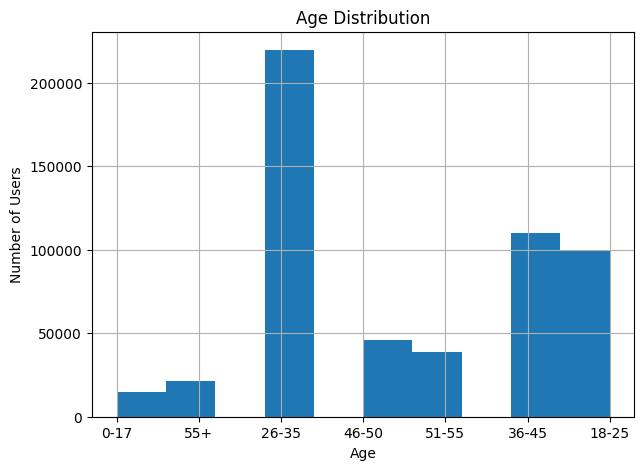

In [ ]:
# Age Distribution -
df1['Age'].hist(figsize=(7, 5))
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

<font size = 4> Bivariate Analysis Age vs Purchase amount

In [ ]:
# No. of unique users in each category -
df1.groupby('Age')['User_ID'].nunique()

,User_ID
Age,
0-17,218
18-25,1069
26-35,2053
36-45,1167
46-50,531
51-55,481
55+,372


In [ ]:
df1.groupby('Age')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


So here we can see something intresting, though max. no. of transactions are made by age group of 26 to 35 but the average purchase amount for the age group 51-55 is the max. Lets see the visual representation of the same

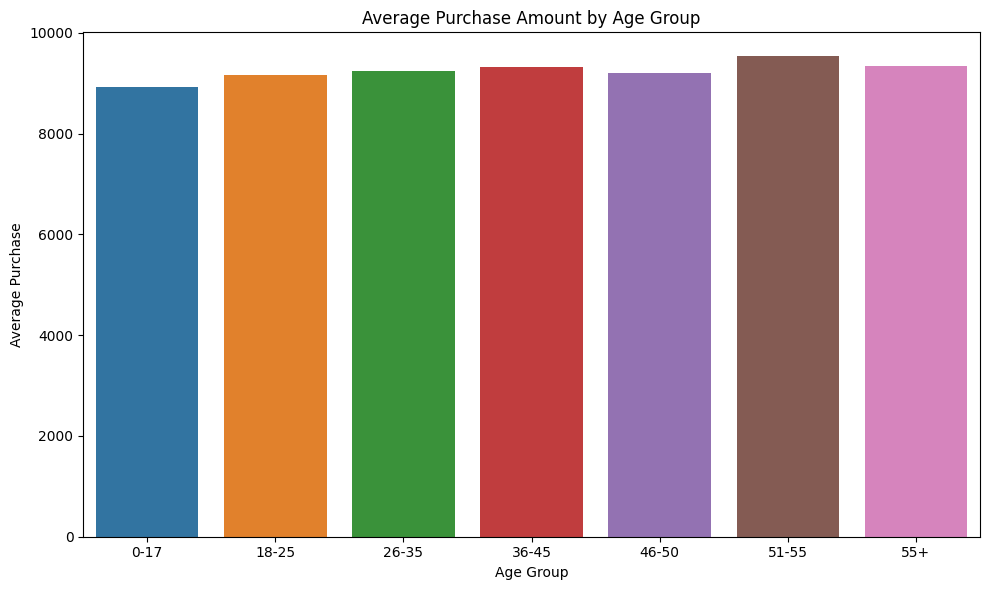

In [ ]:

# Calculate average purchase per age group
age_purchase_avg = df1.groupby('Age')['Purchase'].mean().reset_index()

# Sort age bins logically if needed (optional, if your bins are not ordered)
# age_order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

plt.figure(figsize=(10, 6))
sns.barplot(data=age_purchase_avg, x='Age', y='Purchase', order=age_purchase_avg['Age'], hue = 'Age')

plt.title('Average Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase')
plt.tight_layout()
plt.show()

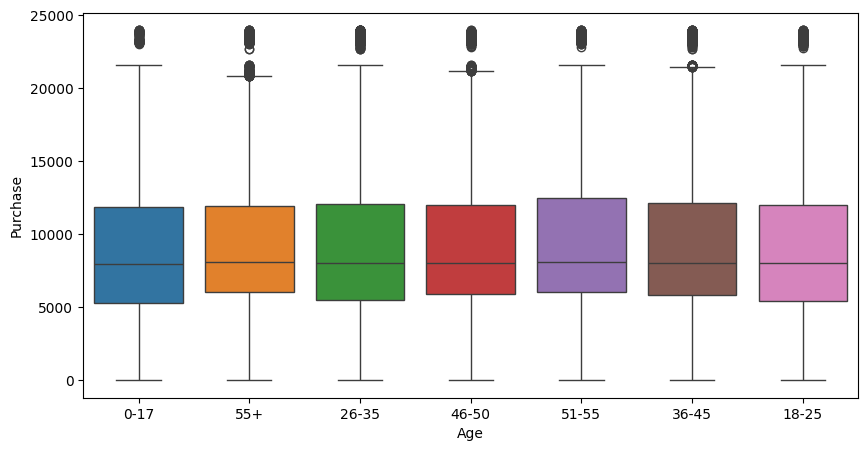

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Age', y='Purchase', data=df, hue = 'Age')
plt.show()

As we can see that the average purchase value for each age group are nearly the same. The confidence interval of these age group might overlap. But still we will test two age groups.

* One with max avg purchase amount i.e. 51-55
* Other with max. no. of transactions i.e. 26-35


<FONT SIZE = 4>Applying CLT

In [ ]:
size=300
iterations=1000

In [ ]:
mean_26_35 =[df[df['Age']=='26-35']['Purchase'].sample(size).mean() for i in range(iterations)]

In [ ]:
mean_51_55 =[df[df['Age']=='51-55']['Purchase'].sample(size).mean() for i in range(iterations)]

Now we are going to calculate confidence interval of 99% using this formula
**<font color='purple'></font>**   

Confidence Interval = $\bar X ± Z \left( \frac {σ}{\sqrt n}\right)$

OR  
$[\bar {X} - Z * (\frac{σ}{\sqrt n}) \ ,\  \bar {X} + Z * (\frac{σ}{\sqrt n})]$    

In [ ]:
from scipy.stats import norm
z99 = norm.ppf(1-0.005)

In [ ]:
# For 26-35 -
lower_limit_26_35 = pd.Series(mean_26_35).mean() - (pd.Series(mean_26_35).std()/ np.sqrt(1000)) * z99
upper_limit_26_35 = pd.Series(mean_26_35).mean() + (pd.Series(mean_26_35).std()/ np.sqrt(1000)) * z99

In [ ]:
print("Lower Limit for married is {:.2f}".format(lower_limit_26_35))
print("Upper Limit for married is {:.2f}".format(upper_limit_26_35))

Lower Limit for married is 9238.48
Upper Limit for married is 9284.21


In [ ]:
# For 51-55 -
lower_limit_51_55 = pd.Series(mean_51_55).mean() - (pd.Series(mean_51_55).std()/ np.sqrt(1000)) * z99
upper_limit_51_55 = pd.Series(mean_51_55).mean() + (pd.Series(mean_51_55).std()/ np.sqrt(1000)) * z99

In [ ]:
print("Lower Limit for married is {:.2f}".format(lower_limit_51_55))
print("Upper Limit for married is {:.2f}".format(upper_limit_51_55))

Lower Limit for married is 9508.53
Upper Limit for married is 9556.28


In [ ]:
from scipy import stats
import numpy as np
alpha = 0.95
dof = len(mean_26_35)-1

ci = stats.t.interval(alpha, dof, loc=np.mean(mean_26_35),
                                  scale=stats.sem(mean_26_35))
print(ci)

(np.float64(9243.925052604947), np.float64(9278.76067406172))


In [ ]:
from scipy import stats
import numpy as np
alpha = 0.95
dof = len(mean_26_35)-1

ci = stats.t.interval(alpha, dof, loc=np.mean(mean_51_55),
                                  scale=stats.sem(mean_51_55))
print(ci)

(np.float64(9514.21668482931), np.float64(9550.596395170689))


<font size = 4>Key Observations

✅ Highest Average Purchase: Age group 51–55 shows the highest average purchase amount.

❌ Confidence Intervals Don’t Overlap: The confidence interval for 51–55 and 26–35 do not overlap, indicating a statistically significant difference in spending.

📈 Most Transactions: The age group 26–35 contributes the highest number of transactions, despite lower average purchase.

<font size = 4> Business Insight

While the 26–35 age group brings high volume, the 51–55 group brings higher value per transaction.

<font size = 4>✅ Recommendations for Walmart

Targeted Marketing for 51–55: Focus on premium product promotions and personalized offers for the 51–55 age group to maximize revenue per purchase.

Boost Basket Size in 26–35: Implement bundle offers, loyalty programs, or cross-selling to increase the average cart value for the 26–35 group.

Segmentation Strategy: Use age-based segmentation to tailor messaging — prioritize value for older customers and variety/discounts for younger, high-volume buyers.

<font size4>✅ Final Insights

Gender: Male customers spend significantly more than female customers during Black Friday, with non-overlapping confidence intervals confirming statistical significance.

Marital Status: No significant difference in spending between married and unmarried customers — their confidence intervals largely overlap.

Age:

51–55 age group has the highest average purchase amount.

26–35 age group has the highest number of transactions, but with a lower average purchase.

Confidence intervals between these two age groups do not overlap, suggesting a real difference in spending behavior.

<font size = 4>💡 Recommendations for Walmart

Gender-Based Marketing: Create male-focused campaigns and offers during peak sale seasons to boost conversion and revenue.

Age-Based Strategy:

For 51–55: Promote high-value or premium products, with personalized offers to maximize average spend.

For 26–35: Use bundles, cross-selling, and loyalty rewards to increase basket size and tap into their high volume of purchases.

No Action Needed on Marital Status: Avoid segmenting marketing strategies by marital status as there's no meaningful difference in spending behavior.



<font size = 4>🔚 Conclusion

Walmart should focus its marketing and product strategies on high-spending segments like males and older age groups, while simultaneously increasing transaction value among younger, high-volume shoppers. These insights, supported by confidence interval analysis and the Central Limit Theorem, can drive data-backed, profit-optimized decisions.